In [1]:
import folium 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../utils/')
from data_extraction import DataExtraction
dextract = DataExtraction()

In [3]:
df = dextract.load_data('../data/features.csv')
df.head(10)

,id,order_id,driver_id,driver_action,lat,lng,driver_location,trip_origin,trip_destination,trip_Start_time,trip_end_time,trip_distance,trip_to_driver_distance,trip_time,trip_speed,isHoliday,isWeekend
0,1,392001,243828,accepted,6.602207,3.270465,"6.6022066,3.2704649","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,0.694264,0 days 00:03:37,0.096702,0,0
1,2,392001,243588,rejected,6.592097,3.287445,"6.5920972,3.2874447","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,1.551694,0 days 00:03:37,0.096702,0,0
2,3,392001,243830,rejected,6.596133,3.281784,"6.5961334,3.2817841","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,0.786777,0 days 00:03:37,0.096702,0,0
3,4,392001,243539,rejected,6.596142,3.280526,"6.5961416,3.2805263","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,0.692054,0 days 00:03:37,0.096702,0,0
4,5,392001,171653,rejected,6.609232,3.288800,"6.6092317,3.2887999","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,1.621848,0 days 00:03:37,0.096702,0,0
5,6,392001,245662,rejected,6.593095,3.287759,"6.5930949,3.2877592","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,1.511958,0 days 00:03:37,0.096702,0,0
6,7,392001,171651,rejected,6.613538,3.270779,"6.613538,3.2707793","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,1.526093,0 days 00:03:37,0.096702,0,0
7,8,392001,243906,rejected,6.591838,3.276124,"6.591838,3.2761242","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,1.019387,0 days 00:03:37,0.096702,0,0
8,9,392001,226949,rejected,6.610941,3.276126,"6.610941393307,3.2761261146546","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,1.096236,0 days 00:03:37,0.096702,0,0
9,10,392001,243769,rejected,6.617199,3.271723,"6.617199,3.2717225","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,1.867541,0 days 00:03:37,0.096702,0,0


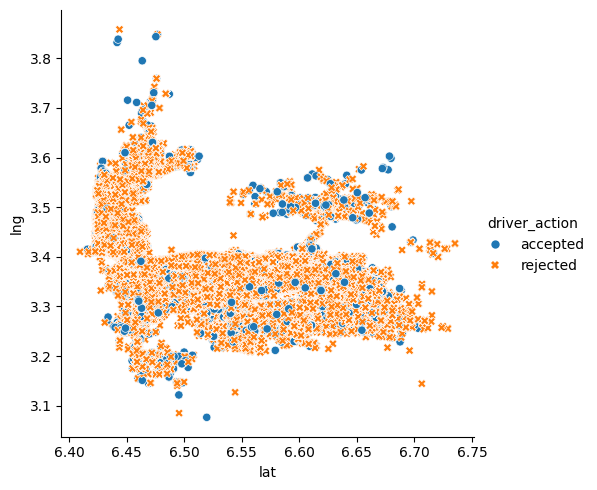

In [4]:
sns.relplot(
    data=df,
    x="lat", y="lng", hue="driver_action", style="driver_action"
)

In [6]:
df_acc = df.groupby(['order_id','driver_action']).agg(
    {'trip_to_driver_distance':'mean'}).reset_index()
# df_acc['dod'] = df_acc['driver_order_dst']['mean']
df_acc

,order_id,driver_action,trip_to_driver_distance
0,392001,accepted,0.694264
1,392001,rejected,1.297065
2,392005,accepted,1.959786
3,392005,rejected,1.766810
4,392009,accepted,2.947683
...,...,...,...
51177,497721,rejected,3.114213
51178,510268,accepted,1.842496
51179,510268,rejected,2.271661
51180,517948,accepted,2.297595


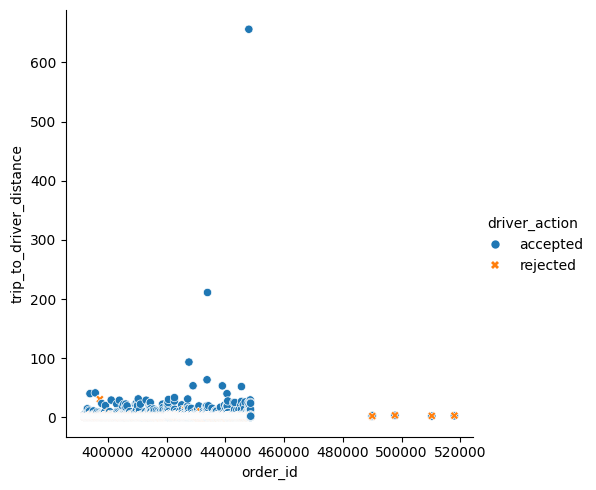

In [7]:
sns.relplot(
    data=df_acc[df_acc['trip_to_driver_distance']<500000],
    x="order_id", y="trip_to_driver_distance", hue="driver_action", style="driver_action"
)

In [8]:
accepted_df = df[df['driver_action']=='accepted']
rejected_df = df[df['driver_action']=='rejected']

print('accepted shape {}'.format(accepted_df.shape))
print('rejected shape {}'.format(rejected_df.shape))

accepted shape (25870, 17)
rejected shape (1529847, 17)


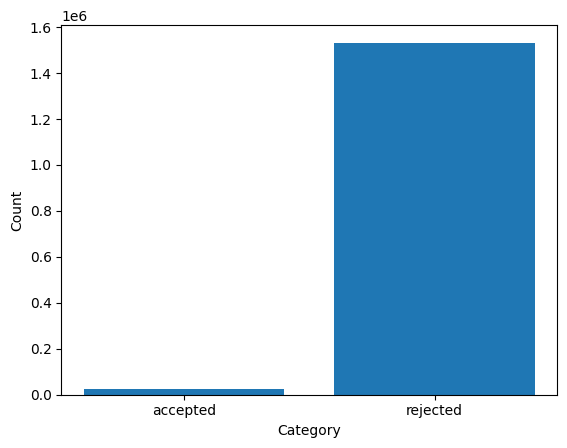

In [10]:
plt.bar(['accepted', 'rejected'], [25902, 1531837])
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [14]:
df_acc = df.groupby(['driver_action','isWeekend']).agg(
    {'driver_action':['count']}).reset_index()
df_acc

,driver_action,isWeekend,driver_action
,,,count
0,accepted,0,22134
1,accepted,1,3736
2,rejected,0,1333707
3,rejected,1,196140


In [15]:
df_acc_new = pd.DataFrame()
df_acc_new['count'] = df_acc['driver_action']['count'] 
df_acc_new['isWeekend'] = df_acc['isWeekend'] 
df_acc_new['driver_action'] = df_acc['driver_action'][''] 

<Axes: xlabel='isWeekend', ylabel='count'>

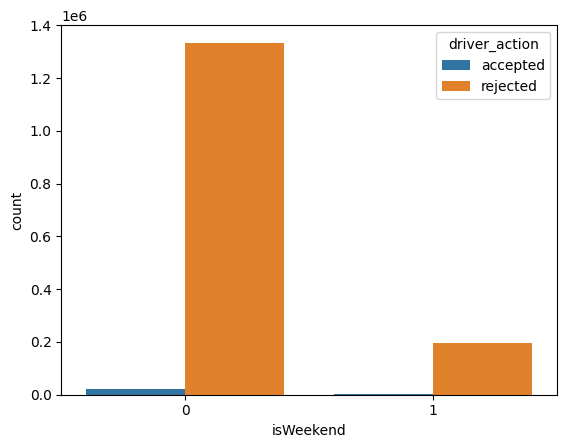

In [16]:
sns.barplot(
data=df_acc_new,
x="isWeekend", y="count", hue="driver_action"
)

In [20]:
df_acc_new = pd.DataFrame()
df_acc_new['count'] = df_acc['driver_action']['count'] 
df_acc_new['day'] = df_acc['day'].astype('int')
df_acc_new['driver_action'] = df_acc['driver_action'][''] 

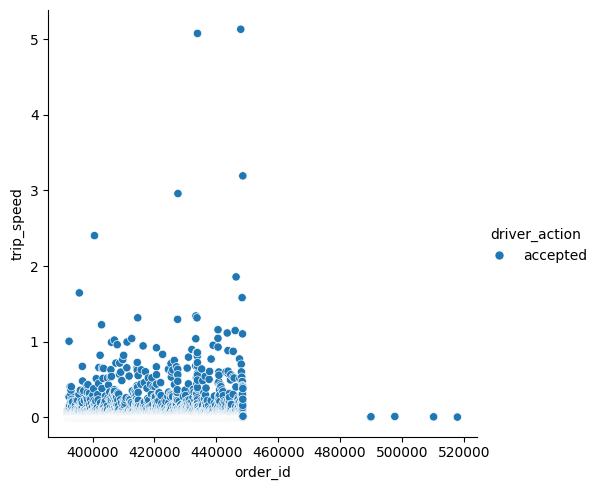

In [18]:
sns.relplot(
    data=accepted_df,
    x="order_id", y="trip_speed", hue="driver_action", style="driver_action"
)

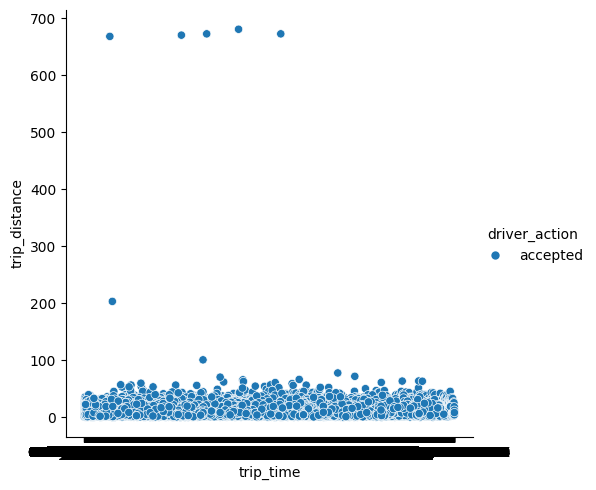

In [20]:
sns.relplot(
    data=accepted_df,
    x="trip_time", y="trip_distance", hue="driver_action", style="driver_action"
)

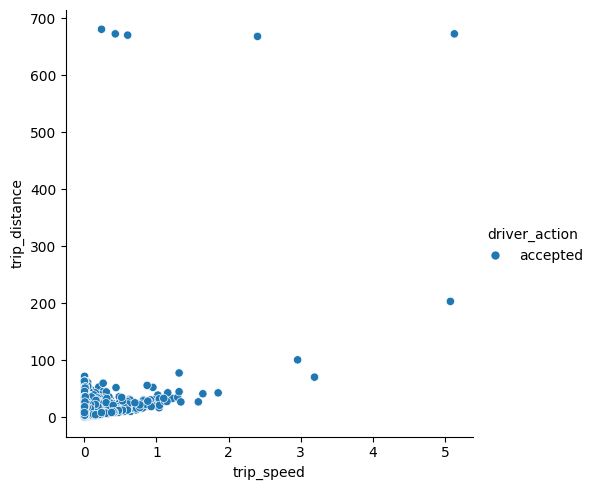

In [21]:
sns.relplot(
    data=accepted_df,
    x="trip_speed", y="trip_distance", hue="driver_action", style="driver_action"
)

In [22]:

handed_over = accepted_df[accepted_df['trip_speed'] < 10]
print('Handed over deliveries count {}'.format(handed_over.shape))

Handed over deliveries count (25870, 17)
